## 🎬 Domain Analysis: Movie Dataset

### 🧩 Domain: Entertainment / Film Industry

This dataset belongs to the **film and entertainment domain**, focusing on metadata related to movies.  
The film industry is one of the largest sources of media content globally, and analyzing this data provides insights into:
- Viewer preferences  
- Financial patterns  
- Production elements that influence a movie’s success  

---

### 📄 Dataset Overview

This dataset contains information on thousands of movies released over several years.  
It includes key attributes such as:

- **title**: Movie title  
- **genres**: Main genres (e.g., Action, Comedy)  
- **budget**: Budget in USD  
- **revenue**: Revenue in USD  
- **overview**: Short plot summary  
- **vote_average**: Average user rating  
- **vote_count**: Number of votes received  
- **release_date**: Date of release  
- **cast**, **crew**: Main actors and film staff  
- **director**: Director of the film  
- **keywords**: Important keywords or themes associated with the movie  


In [10]:
pip install scikit-learn numpy pandas  nltk WordCloud -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk -q

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np 
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud


In [4]:
df=pd.read_csv('movies.csv')

In [5]:
df.sample(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4402,4402,0,Drama Action Thriller,NaN,56491,rebel usa president hostage airplane,en,In Her Line of Fire,When the Vice President's plane goes down near...,0.429587,...,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Behind Enemy Lines No Man Can Stop Her. Only O...,In Her Line of Fire,3.3,9,Mariel Hemingway David Keith David Millbern Ji...,"[{'name': 'Brian Trenchard-Smith', 'gender': 0...",Brian Trenchard-Smith
2845,2845,0,Horror Drama Thriller Science Fiction,NaN,16241,paraguay mengele nazi hunter third reich,en,The Boys from Brazil,Nazi hunter Ezra Lieberman discovers a siniste...,5.315213,...,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,If they survive...will we?,The Boys from Brazil,6.6,101,Gregory Peck Laurence Olivier James Mason Lill...,"[{'name': 'Alixe Gordin', 'gender': 0, 'depart...",Franklin J. Schaffner
2112,2112,20000000,Comedy,http://stxmovies.com/badmoms/,376659,alcohol bar party divorce family,en,Bad Moms,When three overworked and under-appreciated mo...,42.512296,...,100.0,"[{""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0...",Released,Party like a mother.,Bad Moms,6.3,1252,Mila Kunis Kristen Bell Kathryn Hahn Christina...,"[{'name': 'Jon Lucas', 'gender': 2, 'departmen...",Jon Lucas
2169,2169,20000000,Action Drama Fantasy Horror Thriller,http://www.theofficialjohncarpenter.com/vampires/,9945,based on novel new mexico party vampire hunter...,en,Vampires,The church enlists a team of vampire-hunters t...,17.016284,...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,From the Master of Evil. Comes a New Breed of ...,Vampires,5.8,255,James Woods Daniel Baldwin Sheryl Lee Thomas I...,"[{'name': 'John Carpenter', 'gender': 2, 'depa...",John Carpenter
1701,1701,29000000,Action,NaN,1428,corruption cia,en,Once Upon a Time in Mexico,"Hitman ""El Mariachi"" becomes involved in inter...",27.555646,...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Time Has Come.,Once Upon a Time in Mexico,6.2,594,Antonio Banderas Salma Hayek Johnny Depp Eva M...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
887,887,52000000,Comedy Romance,http://www.valentinesdaymovie.com/,32856,flower married couple florist kiss single,en,Valentine's Day,More than a dozen Angelenos navigate Valentine...,25.419290,...,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A Love Story. More or Less.,Valentine's Day,5.7,1013,Jessica Alba Jessica Biel Bradley Cooper Eric ...,"[{'name': 'Garry Marshall', 'gender': 2, 'depa...",Garry Marshall
509,509,75000000,Family Animation,NaN,953,lion hippopotamus giraffe penguin zebra,en,Madagascar,Zoo animals leave the comforts of man-made hab...,48.110909,...,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Someone's got a zoo loose.,Madagascar,6.6,3237,Ben Stiller Chris Rock David Schwimmer Jada Pi...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Eric Darnell
1173,1173,35000000,Comedy,http://www.theinternmovie.com/,257211,intern woman director,en,The Intern,70-year-old widower Ben Whittaker has discover...,53.114573,...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Experience never gets old,The Intern,7.1,1881,Robert De Niro Anne Hathaway Rene Russo Anders...,"[{'name': 'Robert Leighton', 'gender': 2, 'dep...",Nancy Meyers
554,554,72500000,Comedy,http://www.sonypictures.com/homevideo/talladeg...,9718,north carolina prayer family dinner advertisin...,en,Talladega Nights: The Ballad of Ricky Bobby,Lifelong friends and national idols Ricky Bobb...,12.599836,...,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The story of a man who could only count to #1,Talladega Nights: The Ballad of Ricky Bobby,6.2,491,Will Ferrell John C. Reilly S

In [6]:
df.shape

(4803, 24)

In [7]:
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [8]:
df.tail(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

## Do Feature Extraction to many feature no need:

In [11]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [12]:
df.columns=df.columns.str.strip().str.lower()

In [13]:
df2=['title','genres','overview','keywords','revenue','crew','director','cast']

In [14]:
df=df[df2]

In [15]:
df

,title,genres,overview,keywords,revenue,crew,director,cast
0,Avatar,Action Adventure Fantasy Science Fiction,"In the 22nd century, a paraplegic Marine is di...",culture clash future space war space colony so...,2787965087,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Sam Worthington Zoe Saldana Sigourney Weaver S...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,"Captain Barbossa, long believed to be dead, ha...",ocean drug abuse exotic island east india trad...,961000000,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Stel...
2,Spectre,Action Adventure Crime,A cryptic message from Bond’s past sends him o...,spy based on novel secret agent sequel mi6,880674609,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...
3,The Dark Knight Rises,Action Crime Drama Thriller,Following the death of District Attorney Harve...,dc comics crime fighter terrorist secret ident...,1084939099,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Christian Bale Michael Caine Gary Oldman Anne ...
4,John Carter,Action Adventure Science Fiction,"John Carter is a war-weary, former military ca...",based on novel mars medallion space travel pri...,284139100,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Taylor Kitsch Lynn Collins Samantha Morton Wil...
...,...,...,...,...,...,...,...,...
4798,El Mariachi,Action Crime Thriller,El Mariachi just wants to play his guitar and ...,united states\u2013mexico barrier legs arms pa...,2040920,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez,Carlos Gallardo Jaime de Hoyos Peter Marquardt...
4799,Newlyweds,Comedy Romance,A newlywed couple's honeymoon is upended by th...,NaN,0,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...
4800,"Signed, Sealed, Delivered",Comedy Drama Romance TV Movie,"""Signed, Sealed, Delivered"" introduces a dedic...",date love at first sight narration investigati...,0,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith,Eric Mabius Kristin Booth Crystal Lowe Geoff G...
4801,Shanghai Calling,NaN,When ambitious New York attorney Sam is sent t...,NaN,0,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   genres    4775 non-null   object
 2   overview  4800 non-null   object
 3   keywords  4391 non-null   object
 4   revenue   4803 non-null   int64 
 5   crew      4803 non-null   object
 6   director  4773 non-null   object
 7   cast      4760 non-null   object
dtypes: int64(1), object(7)
memory usage: 300.3+ KB


## keywords (8.6% missing)
It's useful for recommendation systems.

But not critical for all tasks.

✅ Best option: fill with an empty list or string

In [18]:
df['keywords'] = df['keywords'].fillna('[]')
df['genres'] = df['genres'].fillna('Unknown Genre')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['overview'] = df['overview'].fillna('No overview available.')
df['director'] = df['director'].fillna('Unknown Director')


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   genres    4803 non-null   object
 2   overview  4803 non-null   object
 3   keywords  4803 non-null   object
 4   revenue   4803 non-null   int64 
 5   crew      4803 non-null   object
 6   director  4803 non-null   object
 7   cast      4803 non-null   object
dtypes: int64(1), object(7)
memory usage: 300.3+ KB


## Feature Extraction

In [21]:
df['combined_text'] = df['overview'] + " " + df['keywords'] + " " + df['genres']
df['crew_cast_director']=df['crew']+ " "+df['cast']+" "+df['director']


In [22]:
data=df[['title','combined_text','crew_cast_director']]

In [23]:
data

,title,combined_text,crew_cast_director
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{'name': 'Dariusz Wolski', 'gender': 2, 'depa..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{'name': 'Andrew Stanton', 'gender': 2, 'depa..."
...,...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de..."
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{'name': 'Edward Burns', 'gender': 2, 'depart..."
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{'name': 'Carla Hetland', 'gender': 0, 'depar..."
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm..."


In [24]:
data.shape

(4803, 3)

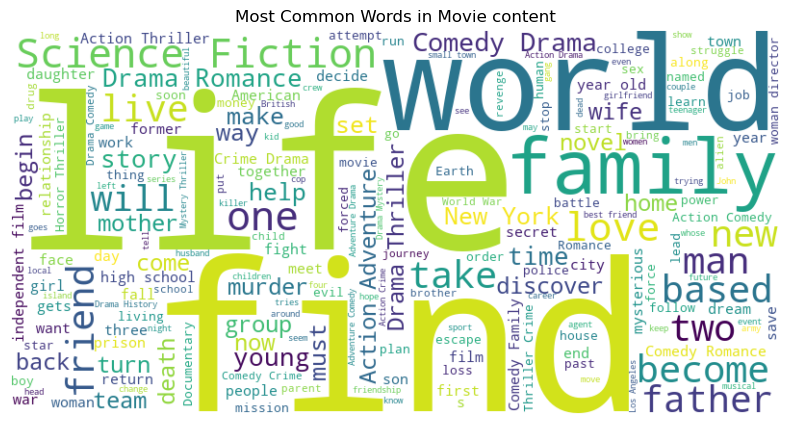

In [25]:
combined_text=' '.join(df['combined_text'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

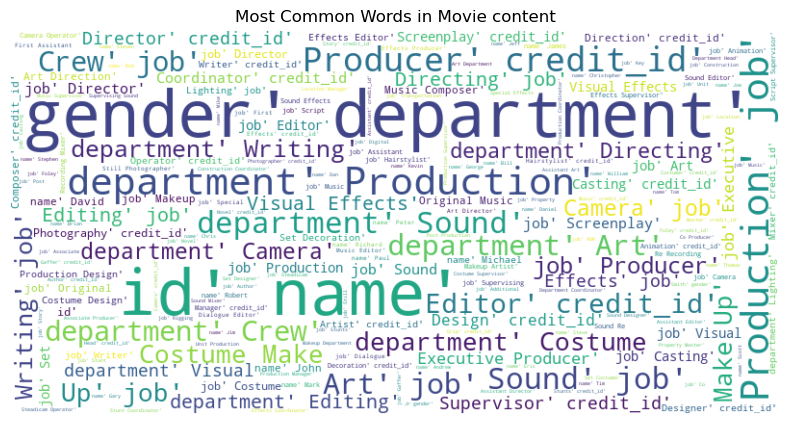

In [26]:
crew_cast_director=' '.join(df['crew_cast_director'])
wordcloud2=WordCloud(width=800,height=400,background_color='white').generate(crew_cast_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [27]:
nltk.download('punkt')
# nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
# stop_words

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


# Apply preprocessing to the movie content


In [38]:

data.loc[:,'cleaned_combined_text'] = df['combined_text'].apply(preprocess_text)
data.loc[:,'cleaned_crew_cast_director'] = df['crew_cast_director'].apply(preprocess_text)


In [32]:
data

,title,combined_text,crew_cast_director,cleaned_combined_text,cleaned_crew_cast_director
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",nd century paraplegic marine dispatched moon p...,name stephen e rivkin gender department editin...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",captain barbossa long believed dead come back ...,name dariusz wolski gender department camera j...
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",cryptic message bonds past sends trail uncover...,name thomas newman gender department sound job...
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",following death district attorney harvey dent ...,name hans zimmer gender department sound job o...
4,John Carter,"John Carter is a war-weary, former military ca...","[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",john carter warweary former military captain w...,name andrew stanton gender department writing ...
...,...,...,...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",el mariachi wants play guitar carry family tra...,name robert rodriguez gender department direct...
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",newlywed couples honeymoon upended arrivals re...,name edward burns gender department directing ...
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{'name': 'Carla Hetland', 'gender': 0, 'depar...",signed sealed delivered introduces dedicated q...,name carla hetland gender department costume m...
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",ambitious new york attorney sam sent shanghai ...,name daniel hsia gender department directing j...


## Vectorization with TF-IDF

In [72]:
data.loc[:,'final_text'] = data['cleaned_combined_text'] + ' ' + data['cleaned_crew_cast_director']
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['final_text'])


## Compute Cosine Similarity



In [76]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [77]:
print(cosine_sim[1])

[0.69770766 1.         0.71127342 ... 0.49784672 0.12576197 0.21570192]


In [105]:

# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=15):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title']].iloc[movie_indices]

In [107]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [109]:

row_index = df[df['title'] == "Avengers: Age of Ultron"].index
# row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([7], dtype='int64')


In [111]:
movie_name = data["title"][9]
print(movie_name)
     

Batman v Superman: Dawn of Justice


In [113]:
# Example Recommendation
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie Batman v Superman: Dawn of Justice
                                     title
223              The Chronicles of Riddick
828                      Kill Bill: Vol. 1
242                         Fantastic Four
338                              The Alamo
182                                Ant-Man
82          Dawn of the Planet of the Apes
250                            The Aviator
320                        Black Hawk Down
365                                Contact
303                               Catwoman
112                              Alexander
72                           Suicide Squad
107                               Warcraft
26              Captain America: Civil War
102  The Hunger Games: Mockingjay - Part 2
